In [42]:
%run "../HyperParameterOpt/GenerateExperiments/res_experiment.py"
import numpy as np
from matplotlib import pyplot as plt



array([[0.11086957, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.66521739, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.21956522, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.77391304, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 2.32826087,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        2.8826087 , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 3.43695652, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.       

In [165]:
DIFF_EQ_PARAMS = {
                  "x0": [-20, 10, -.5],
                  "begin": 0,
                  "end": 85,
                  "timesteps": 85000,
                  "train_per": .889,
                  "solver": lorenz_equ,
                  "clip": 40
                 }
DIFF_EQ_PARAMS["x0"] = random_lorenz_x0()
t, test_t, u = rc_solve_ode(DIFF_EQ_PARAMS)
x0 = u(test_t[-1])

In [166]:
x0

array([ 8.76426472, 16.66257213, 11.24564925])

In [167]:
eps = 0.001
delta = (2*np.random.rand(3) - 1) * eps
delta

array([0.00015049, 0.00057681, 0.00036911])

In [168]:
repeat_orbit_prms = {
    "x0": x0,
    "begin": 0,
    "end": 40,
    "timesteps": 40000,
    "train_per": .75,
    "solver": lorenz_equ,
    "clip": 0
}

delta_orbit_prms = {
    "x0": x0 + delta,
    "begin": 0,
    "end": 40,
    "timesteps": 40000,
    "train_per": .75,
    "solver": lorenz_equ,
    "clip": 0
}

tr_t, ts_t, u = rc_solve_ode(repeat_orbit_prms)
tr_t, te_t, u_d = rc_solve_ode(delta_orbit_prms)

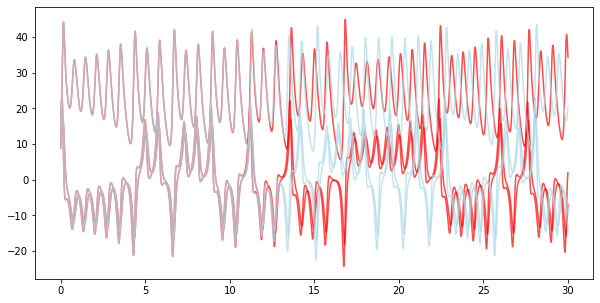

In [169]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.plot(tr_t, u(tr_t).T, c="red", alpha=0.7)
plt.plot(tr_t, u_d(tr_t).T, c="lightblue", alpha=.7)

## Diagonal with increasing size

In [269]:
N = 10
A = np.zeros((N, N))
rhos = np.linspace(.1, 12, 10)
for i in range(N):
    A[i, i] = rhos[i]

rcomp = ResComp(
    A, 
    uniform_weights=False, 
    spect_rad=np.max(rhos),
    sparse_res=False,
    signal_dim = 1,
    sigma=1/20,
    gamma=3
)
rcomp.W_in = np.ones_like(rcomp.W_in)
r0 = rcomp.state_0

In [270]:
mu = np.mean(u(tr_t), axis=1)
xt = lambda t: np.array([u(t)[0] - mu[0]])
xt_d = lambda t: np.array([u_d(t)[0] - mu[0]])
print(f"Max difference from mean: {np.max(u(tr_t)[0] - mu[0])}")

states = rcomp.drive(tr_t, xt)
rcomp.state_0 = r0
states_d = rcomp.drive(tr_t, xt_d)

Max difference from mean: 18.544862927882676


In [271]:
colors = np.random.rand(2,3)

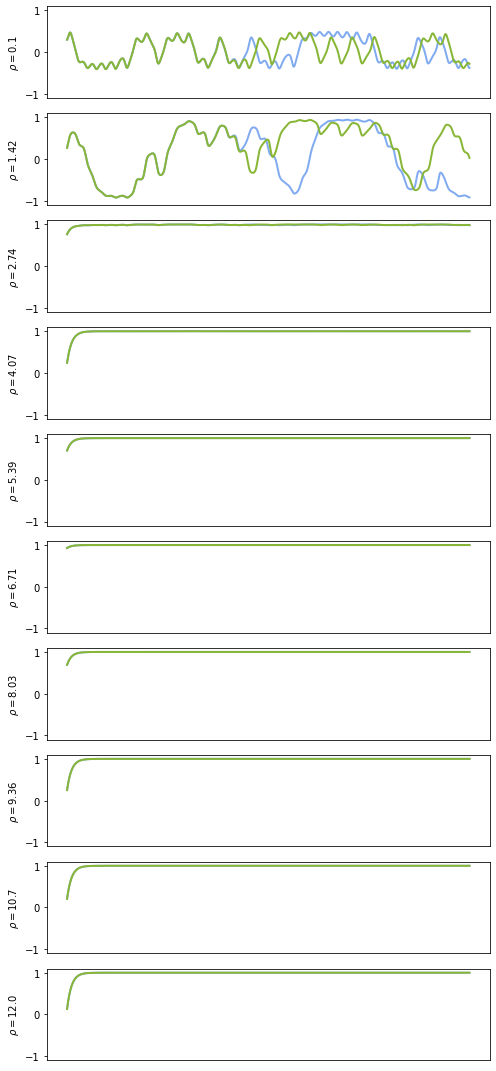

In [272]:
plt.rcParams["figure.figsize"] = [7, 15]
for i in range(N):
    plt.subplot(10, 1, i+1)
    plt.ylabel(r"$\rho = {number:.{digits}}$".format(number=rhos[i], digits=3))
    plt.plot(tr_t, states[:, i], lw=2, c=colors[1])
    plt.plot(tr_t, states_d[:, i], lw=2, c=colors[0])
    plt.xticks([],[])
    plt.ylim(-1.1,1.1)
plt.tight_layout()

## Scale up sigma with spectral radius

In [386]:
N = 10
A = np.zeros((N, N))
rhos = np.linspace(.1, 12, 10)
for i in range(N):
    A[i, i] = rhos[i]

rcomp = ResComp(
    A, 
    uniform_weights=False, 
    spect_rad=np.max(rhos),
    sparse_res=False,
    signal_dim = 1,
    gamma=3,
    sigma=1.0
)
rcomp.W_in = np.reshape(np.linspace(0.05, 0.8, 10), (10, 1))
r0 = rcomp.state_0
rcomp.W_in

array([[0.05      ],
       [0.13333333],
       [0.21666667],
       [0.3       ],
       [0.38333333],
       [0.46666667],
       [0.55      ],
       [0.63333333],
       [0.71666667],
       [0.8       ]])

In [387]:
mu = np.mean(u(tr_t), axis=1)
xt = lambda t: np.array([u(t)[0] - mu[0]])
xt_d = lambda t: np.array([u_d(t)[0] - mu[0]])
print(f"Max difference from mean: {np.max(u(tr_t)[0] - mu[0])}")

states = rcomp.drive(tr_t, xt)
rcomp.state_0 = r0
states_d = rcomp.drive(tr_t, xt_d)

Max difference from mean: 18.544862927882676


In [388]:
#colors = np.random.rand(2,3)

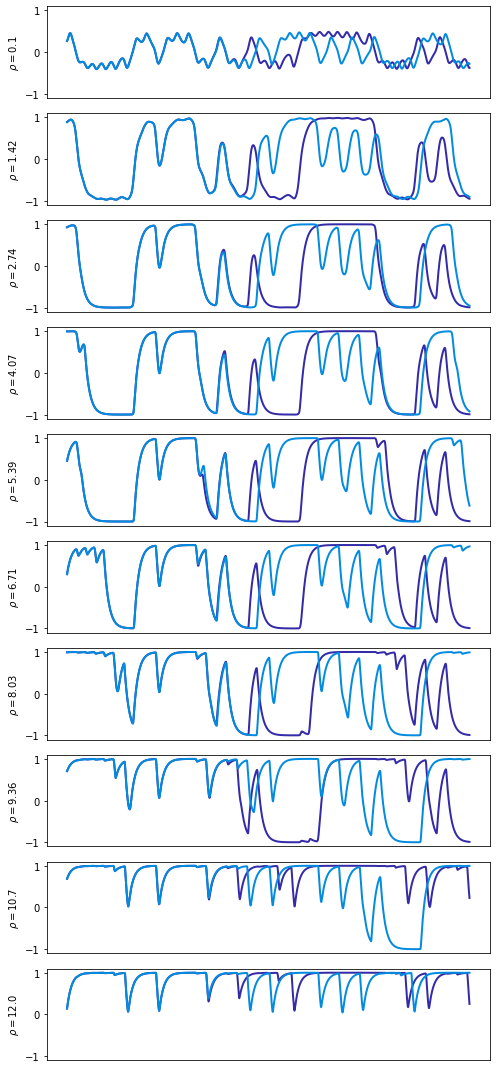

In [389]:
plt.rcParams["figure.figsize"] = [7, 15]
for i in range(N):
    plt.subplot(10, 1, i+1)
    plt.ylabel(r"$\rho = {number:.{digits}}$".format(number=rhos[i], digits=3))
    plt.plot(tr_t, states[:, i], lw=2, c=colors[1])
    plt.plot(tr_t, states_d[:, i], lw=2, c=colors[0])
    plt.xticks([],[])
    plt.ylim(-1.1,1.1)
plt.tight_layout()

In [391]:
np.linalg.matrix_rank(states_d)

10

## Just Scale up Sigma $(\rho < 1)$

In [366]:
N = 10
A = np.zeros((N, N))
rhos = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
for i in range(N):
    A[i, i] = rhos[i]

rcomp = ResComp(
    A, 
    uniform_weights=False, 
    spect_rad=np.max(rhos),
    sparse_res=False,
    signal_dim = 1,
    gamma=3,
    sigma=1.0
)
rcomp.W_in = np.reshape(np.linspace(0.05, 100.0, 10), (10, 1))
r0 = rcomp.state_0
rcomp.W_in

array([[5.00000000e-02],
       [1.11555556e+01],
       [2.22611111e+01],
       [3.33666667e+01],
       [4.44722222e+01],
       [5.55777778e+01],
       [6.66833333e+01],
       [7.77888889e+01],
       [8.88944444e+01],
       [1.00000000e+02]])

In [367]:
mu = np.mean(u(tr_t), axis=1)
xt = lambda t: np.array([u(t)[0] - mu[0]])
xt_d = lambda t: np.array([u_d(t)[0] - mu[0]])
print(f"Max difference from mean: {np.max(u(tr_t)[0] - mu[0])}")

states = rcomp.drive(tr_t, xt)
rcomp.state_0 = r0
states_d = rcomp.drive(tr_t, xt_d)

Max difference from mean: 18.544862927882676


In [368]:
#colors = np.random.rand(2,3)

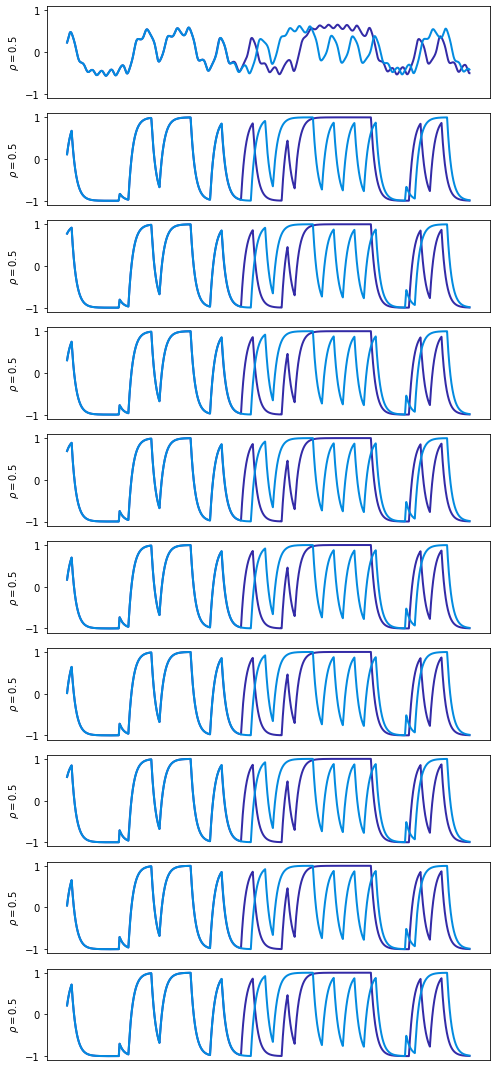

In [369]:
plt.rcParams["figure.figsize"] = [7, 15]
for i in range(N):
    plt.subplot(10, 1, i+1)
    plt.ylabel(r"$\rho = {number:.{digits}}$".format(number=rhos[i], digits=3))
    plt.plot(tr_t, states[:, i], lw=2, c=colors[1])
    plt.plot(tr_t, states_d[:, i], lw=2, c=colors[0])
    plt.xticks([],[])
    plt.ylim(-1.1,1.1)
plt.tight_layout()

## Just Scale up Sigma $(\rho > 1)$

In [392]:
N = 10
A = np.zeros((N, N))
rhos = np.ones(10) * 10.0
for i in range(N):
    A[i, i] = rhos[i]

rcomp = ResComp(
    A, 
    uniform_weights=False, 
    spect_rad=np.max(rhos),
    sparse_res=False,
    signal_dim = 1,
    gamma=3,
    sigma=1.0
)
rcomp.W_in = np.reshape(np.linspace(0.05, 1.0, 10), (10, 1))
r0 = rcomp.state_0
rcomp.W_in

array([[0.05      ],
       [0.15555556],
       [0.26111111],
       [0.36666667],
       [0.47222222],
       [0.57777778],
       [0.68333333],
       [0.78888889],
       [0.89444444],
       [1.        ]])

In [393]:
mu = np.mean(u(tr_t), axis=1)
xt = lambda t: np.array([u(t)[0] - mu[0]])
xt_d = lambda t: np.array([u_d(t)[0] - mu[0]])
print(f"Max difference from mean: {np.max(u(tr_t)[0] - mu[0])}")

states = rcomp.drive(tr_t, xt)
rcomp.state_0 = r0
states_d = rcomp.drive(tr_t, xt_d)

Max difference from mean: 18.544862927882676


In [394]:
#colors = np.random.rand(2,3)

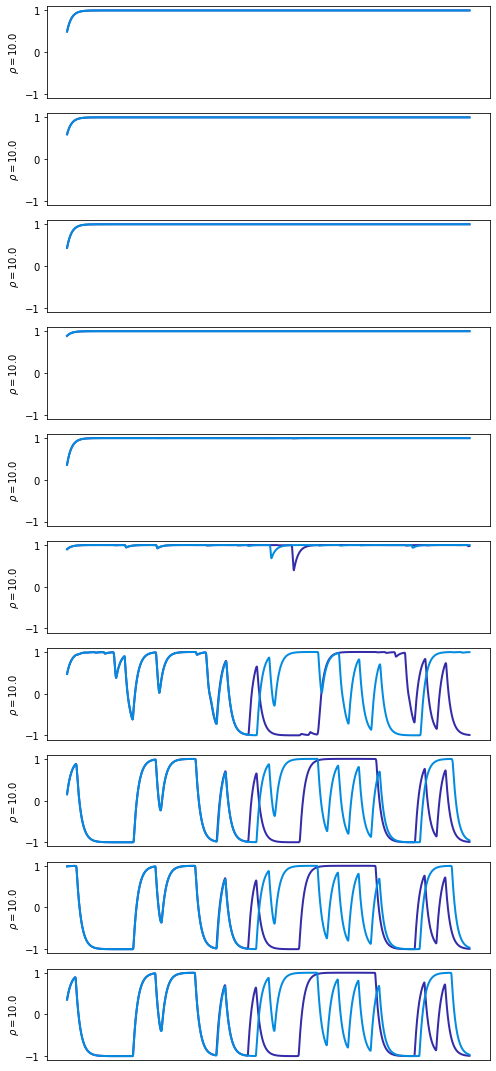

In [395]:
plt.rcParams["figure.figsize"] = [7, 15]
for i in range(N):
    plt.subplot(10, 1, i+1)
    plt.ylabel(r"$\rho = {number:.{digits}}$".format(number=rhos[i], digits=3))
    plt.plot(tr_t, states[:, i], lw=2, c=colors[1])
    plt.plot(tr_t, states_d[:, i], lw=2, c=colors[0])
    plt.xticks([],[])
    plt.ylim(-1.1,1.1)
plt.tight_layout()

10